## 1. 데이터 확인

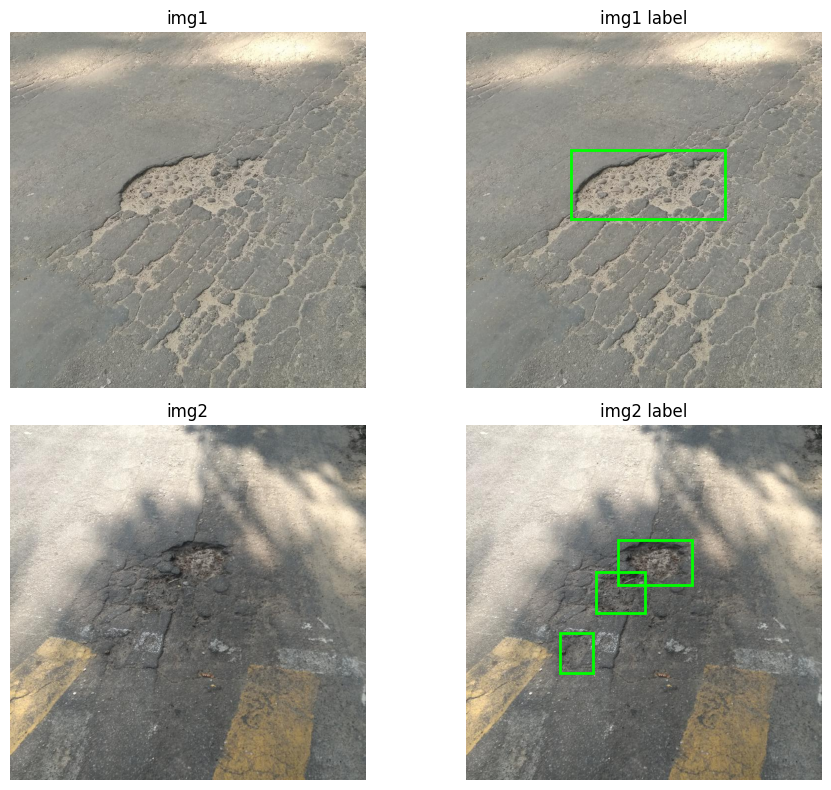

In [36]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

IMG_DIR = "/Users/min/Desktop/Pothole/pothole_dataset/train/images"
LBL_DIR = "/Users/min/Desktop/Pothole/pothole_dataset/train/labels"

# img 1
img1 = cv2.imread(IMG_DIR + "/img-1_jpg.rf.04766deb9036fc43721c26f431c3eb3d.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
H1, W1, _ = img1.shape

# img 2
img2 = cv2.imread(IMG_DIR + "/img-2_jpg.rf.962d887972144063f0280f7969d29c23.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
H2, W2, _ = img2.shape

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# img 1
ax[0,0].imshow(img1)
ax[0,0].set_title("img1")
ax[0,0].axis("off")

ax[0,1].imshow(img1)
ax[0,1].set_title("img1 label")
ax[0,1].axis("off")

with open(LBL_DIR + "/img-1_jpg.rf.04766deb9036fc43721c26f431c3eb3d.txt") as f:
    for line in f:
        _, xc, yc, w, h = map(float, line.split())
        ax[0,1].add_patch(
            patches.Rectangle(
                ((xc - w/2)*W1, (yc - h/2)*H1),
                w*W1, h*H1,
                linewidth=2, edgecolor="lime", facecolor="none"
            )
        )

# img 2
ax[1,0].imshow(img2)
ax[1,0].set_title("img2")
ax[1,0].axis("off")

ax[1,1].imshow(img2)
ax[1,1].set_title("img2 label")
ax[1,1].axis("off")

with open(LBL_DIR + "/img-2_jpg.rf.962d887972144063f0280f7969d29c23.txt") as f:
    for line in f:
        _, xc, yc, w, h = map(float, line.split())
        ax[1,1].add_patch(
            patches.Rectangle(
                ((xc - w/2)*W2, (yc - h/2)*H2),
                w*W2, h*H2,
                linewidth=2, edgecolor="lime", facecolor="none"
            )
        )

plt.tight_layout()
plt.show()


## 2. YOLO 훈련을 위한 yaml 생성

In [38]:
import yaml
import os

extract_path = "/Users/min/Desktop/Pothole/pothole_dataset"

yaml_content = {
    'path': extract_path,            # 데이터셋 루트
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': ['pothole']             
}

yaml_path = os.path.join(extract_path, 'data.yaml')

with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, sort_keys=False)

print(f"data.yaml 생성 완료: {yaml_path}")
print(f" - train: {yaml_content['train']}")
print(f" - val  : {yaml_content['val']}")
print(f" - test : {yaml_content['test']}")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
data.yaml 생성 완료: /Users/min/Desktop/Pothole/pothole_dataset/data.yaml
 - train: train/images
 - val  : valid/images
 - test : test/images


## 3. 모델 훈련

### 3.1 yolo 26n 훈련 (10 epochs)

In [17]:
from ultralytics import YOLO

# 1. 모델 로드
model_1 = YOLO('yolo26n.pt') 

# 2. 훈련
results = model.train(
    data='/Users/min/Desktop/Pothole/pothole_dataset/data.yaml',  
    
    single_cls=True,   
    device='mps',
    epochs=10,         
    imgsz=640,        
    batch=8,           
    workers=0,
    patience=20,       
    project='runs/detect', 
    name='yolo26n' 
)

print("학습 완료")

New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.8 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/min/Desktop/Pothole/pothole_dataset/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26m5, 

### 3.2 yolo 26m 훈련 (50 epochs)

In [39]:
# 1. 모델 로드
model_2 = YOLO('yolo26m.pt') 

# 2. 훈련
results = model.train(
    data='/Users/min/Desktop/Pothole/pothole_dataset/data.yaml',  
    
    single_cls=True,   
    device='mps',
    epochs=50,         
    imgsz=640,        
    batch=8,           
    workers=0,
    patience=20,       
    project='runs/detect', 
    name='yolo26m' 
)

print("학습 완료")

New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.8 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/min/Desktop/Pothole/pothole_dataset/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26m8, 

### 3.3 yolo 26m 훈련 (100epochs, batch 16)

In [20]:
from ultralytics import YOLO

# 1. 모델 로드
model_3 = YOLO('yolo26m.pt') 

# 2. 훈련
results = model.train(
    data='/Users/min/Desktop/Pothole/pothole_dataset/data.yaml',  
    
    single_cls=True,   
    device='mps',
    epochs=100,         
    imgsz=640,        
    batch=16,           
    workers=0,
    patience=20,       
    project='runs/detect', 
    name='yolo26m_epoch_100' 
)

print("학습 완료")

New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.8 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/min/Desktop/Pothole/pothole_dataset/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26m_

## 4. model 3의 검증 세트에서의 지표

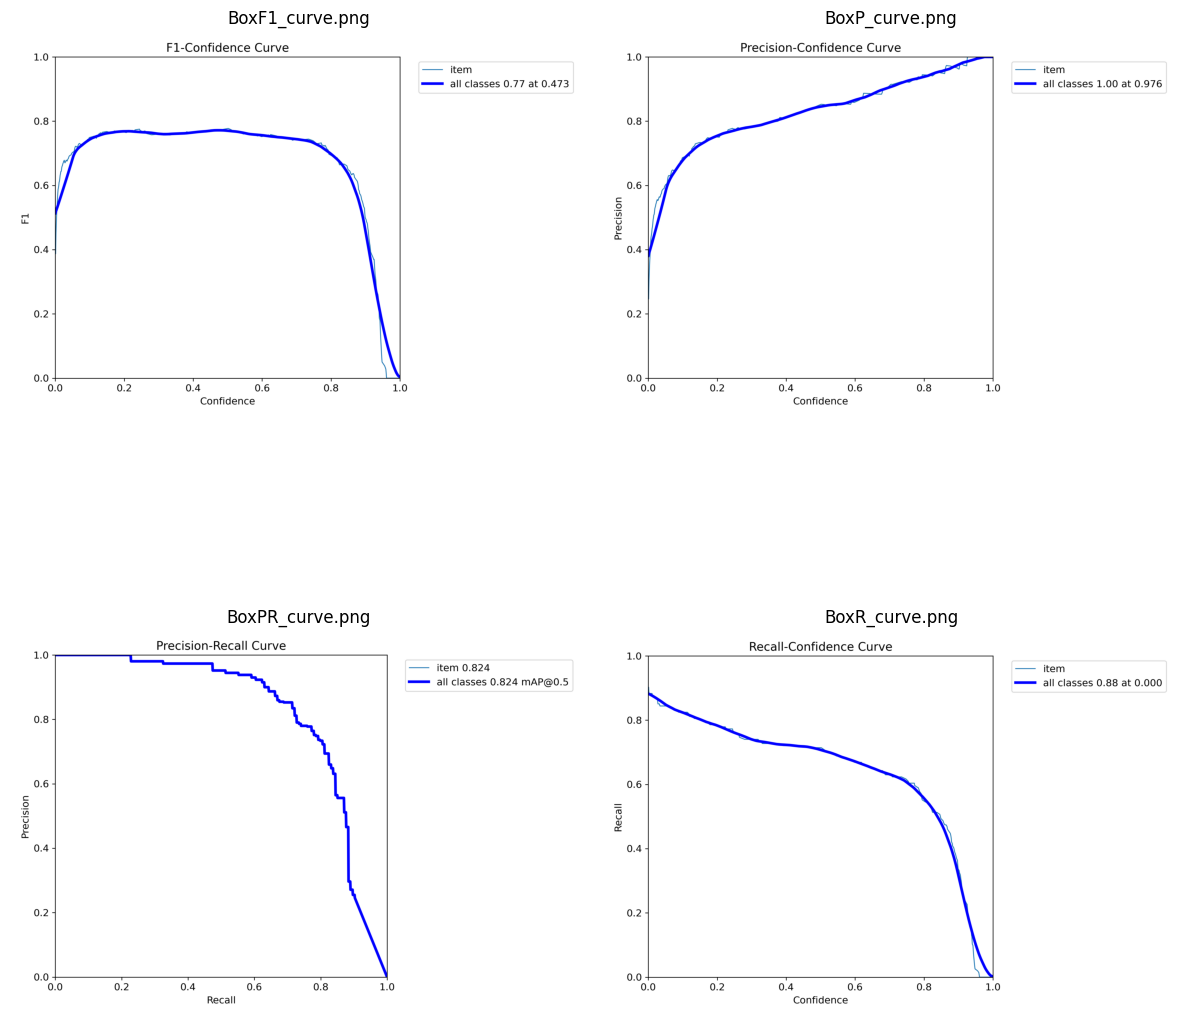

In [54]:
import matplotlib.pyplot as plt
import cv2

files = [
    "/Users/min/Desktop/Pothole/runs/detect/val/BoxF1_curve.png",
    "/Users/min/Desktop/Pothole/runs/detect/val/BoxP_curve.png",
    "/Users/min/Desktop/Pothole/runs/detect/val/BoxPR_curve.png",
    "/Users/min/Desktop/Pothole/runs/detect/val/BoxR_curve.png"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 14))
axes = axes.flatten()

for ax, path in zip(axes, files):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(path.split("/")[-1])
    ax.axis("off")

plt.tight_layout()
plt.show()

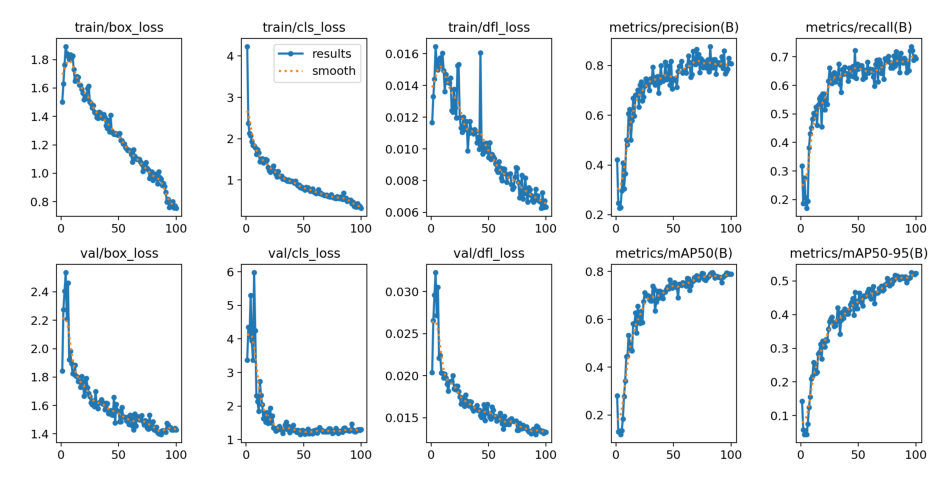

In [63]:
img = cv2.imread('/Users/min/Desktop/Pothole/runs/detect/runs/yolo26m_epoch_100/results.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 14))
plt.imshow(img)
plt.axis('off')   
plt.show()

### 5. model 3 테스트 세트에서 평가

In [43]:
from ultralytics import YOLO

DATA_YAML = "/Users/min/Desktop/Pothole/pothole_dataset/data.yaml"
BEST_PT = "/Users/min/Desktop/Pothole/runs/detect/runs/yolo26m_epoch_100/weights/best.pt"

model = YOLO(BEST_PT)

metrics = model.val(
    data=DATA_YAML,
    split="test",     
    device="mps"
)

print("mAP@0.5      :", metrics.box.map50)
print("mAP@0.5:0.95 :", metrics.box.map)
print("Precision    :", metrics.box.mp)
print("Recall       :", metrics.box.mr)


Ultralytics 8.4.8 🚀 Python-3.11.14 torch-2.9.1 MPS (Apple M4 Pro)
YOLO26m summary (fused): 132 layers, 20,350,223 parameters, 0 gradients, 67.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 228.0±117.0 MB/s, size: 65.8 KB)
val: Scanning /Users/min/Desktop/Pothole/pothole_dataset/test/labels.cache... 67 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 67/67 70.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.0it/s 2.5s0.8s
                   all         67        154      0.839      0.714      0.824      0.532
Speed: 0.3ms preprocess, 24.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /Users/min/Desktop/Pothole/runs/detect/val2
mAP@0.5      : 0.8235897914690814
mAP@0.5:0.95 : 0.5321922089324028
Precision    : 0.8386551778686212
Recall       : 0.7142857142857143
